# Code by Nourin

In [1]:
!pip install klib

In [2]:
!pip install mlxtend

In [3]:
#Importing necessay libraries
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import mlxtend

In [4]:
#now import the data
df=pd.read_csv("Dataset.csv")

In [5]:
df

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
df.shape

(1014, 7)

In [8]:
df.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000

In [9]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [10]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [11]:
#Finding Categorical Columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 1 categorical columns in dataset
['RiskLevel']


In [12]:
#Finding Numerical Columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes!='object'):
        num_col.append(col)
print(f"There are total {len(num_col)} numerical columns in dataset" )
print(num_col)

There are total 6 numerical columns in dataset
['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


In [13]:
df['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [14]:
def uni_cat(col):
    index=df[col].value_counts().index
    value=df[col].value_counts().values

 #Bar Plot

    fig=px.bar(x=index,y=value,pattern_shape=index,text_auto=index,color=index,title=f'Count Plot of {col}')
    fig.update_layout(paper_bgcolor='#FFD450',plot_bgcolor='#40403C',height=400)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()

 #Pie Plot
    fig=px.pie(names=index,values=value,height=400)
    fig.update_layout(paper_bgcolor='#FFD450',title=f'Relative Count of {col}')
    fig.update_traces(textposition='inside',textinfo='percent+label')
    fig.show()

 #NUll Values
    print(f"{col} contains {round(df[col].isnull().mean()*100,2)} % null values")

In [15]:
#Function for analysis on numerical column
def uni_num(col):
  #Distribution Plot
  klib.dist_plot(df[col],fill_kws={'color':'#80d4ff'})


  if (df[col].skew()<0.05 and  df[col].skew()>-0.05):
    print(f"Distribution of {col} is Normally distributed")
    #Outlier Detection
    print(df[col].mean())
    upper_limit=df[col].mean()+3*(df[col].std())
    lower_limit=df[col].mean()-3*(df[col].std())
    print(df[col].describe())
    print(f"Upper Limit of {col} is {upper_limit}")
    print(f"Lower Limit of {col} is {lower_limit}")
    print(df[col][(df[col]<lower_limit) | (df[col]>upper_limit)])
    if(len(df[col][(df[col]<lower_limit) | (df[col]>upper_limit)]==0)):
           print(f"{col} has 0 outliers")
    else:
           print(f"{col} has {len(df[col][(df[col]<lower_limit) | (df[col]>upper_limit)])} outliers")
            
  elif(df[col].skew()>0.05):
    print(f"Distribution of {col} is Right Skewed")
    print(df[col].describe())
    q1=df[col].describe()[4]
    q3=df[col].describe()[6]
    upper_limit=float(q3+[1.5*(q3-q1)])
    lower_limit=float(q1-[1.5*(q3-q1)])
    print(f"Upper Limit of {col} is {upper_limit}")
    print(f"Lower Limit of {col} is {lower_limit}")
    d=(df[col][(df[col]<lower_limit) | (df[col]>upper_limit)])
    print(d)
    print(f"There are total {len(d)} outlier in {col}")       
    
  elif(df[col].skew()<-0.05):
    print(f"Distrubtion of {col} is Left Skewed")
    print(f"Distribution of {col} is Right Skewed")
    print(df[col].describe())
    q1=df[col].describe()[4]
    q3=df[col].describe()[6]
    upper_limit=float(q3+[1.5*(q3-q1)])
    lower_limit=float(q1-[1.5*(q3-q1)])
    print(f"Upper Limit of {col} is {upper_limit}")
    print(f"Lower Limit of {col} is {lower_limit}")
    d=(df[col][(df[col]<lower_limit) | (df[col]>upper_limit)])
    print(d)
    print(f"There are total {len(d)} outlier in {col}")
    
    #Box Plot
  fig=px.box(df,x=col,points='all')
  fig.update_layout(plot_bgcolor='#E1D3D9',paper_bgcolor='#E1D3D9',height=300)
  fig.show()

  #ECDF Plot
  fig=px.ecdf(df,x=col)
  fig.update_layout(paper_bgcolor='#010706',plot_bgcolor='#FAD19D',title=f'ECDF plot of {col}',height=350)
  fig.update_xaxes(color='white')
  fig.update_yaxes(color='white')
  fig.update_layout(font_color='white')
  fig.show()
    
    

Distribution of Age is Right Skewed
count    1014.000000
mean       29.871795
std        13.474386
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        70.000000
Name: Age, dtype: float64
Upper Limit of Age is 69.0
Lower Limit of Age is -11.0
338    70
Name: Age, dtype: int64
There are total 1 outlier in Age


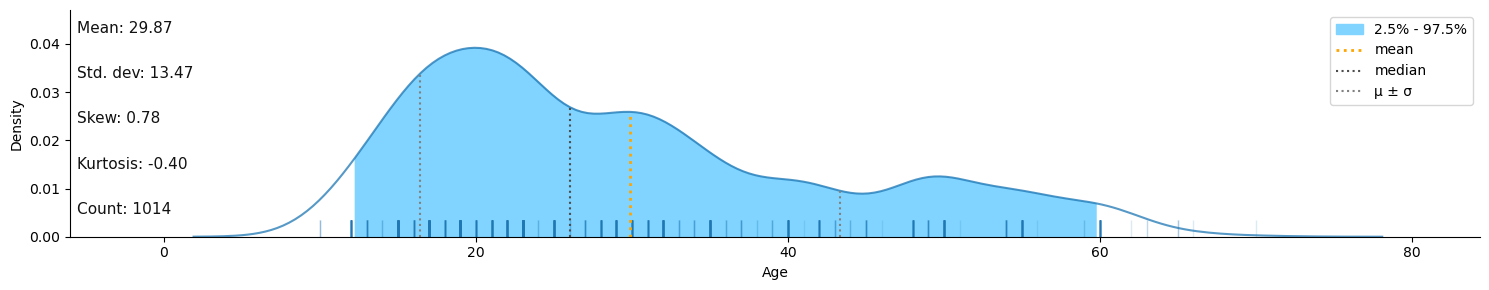

In [16]:
#Age
uni_num('Age')

Distrubtion of SystolicBP is Left Skewed
Distribution of SystolicBP is Right Skewed
count    1014.000000
mean      113.198225
std        18.403913
min        70.000000
25%       100.000000
50%       120.000000
75%       120.000000
max       160.000000
Name: SystolicBP, dtype: float64
Upper Limit of SystolicBP is 150.0
Lower Limit of SystolicBP is 70.0
123    160
130    160
166    160
262    160
362    160
538    160
583    160
689    160
961    160
994    160
Name: SystolicBP, dtype: int64
There are total 10 outlier in SystolicBP


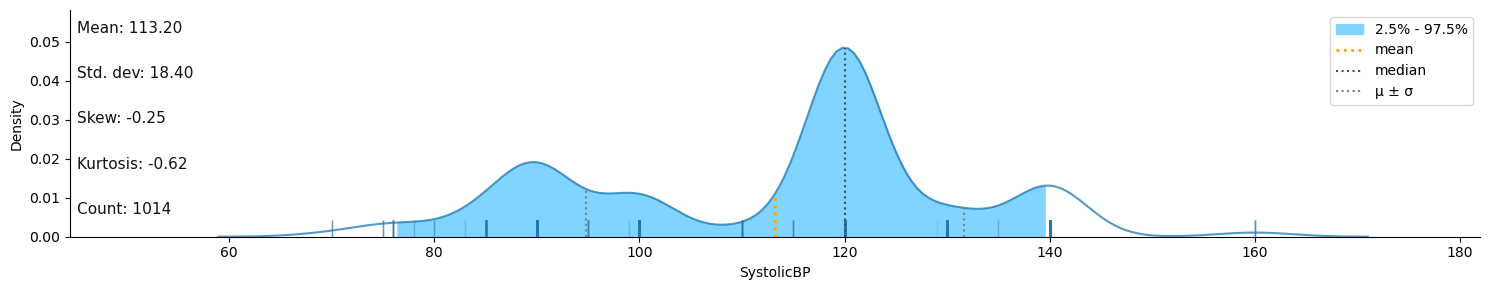

In [17]:
#SystolicBP
uni_num('SystolicBP')

Distribution of DiastolicBP is Normally distributed
76.46055226824457
count    1014.000000
mean       76.460552
std        13.885796
min        49.000000
25%        65.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: DiastolicBP, dtype: float64
Upper Limit of DiastolicBP is 118.11793944072662
Lower Limit of DiastolicBP is 34.80316509576252
Series([], Name: DiastolicBP, dtype: int64)
DiastolicBP has 0 outliers


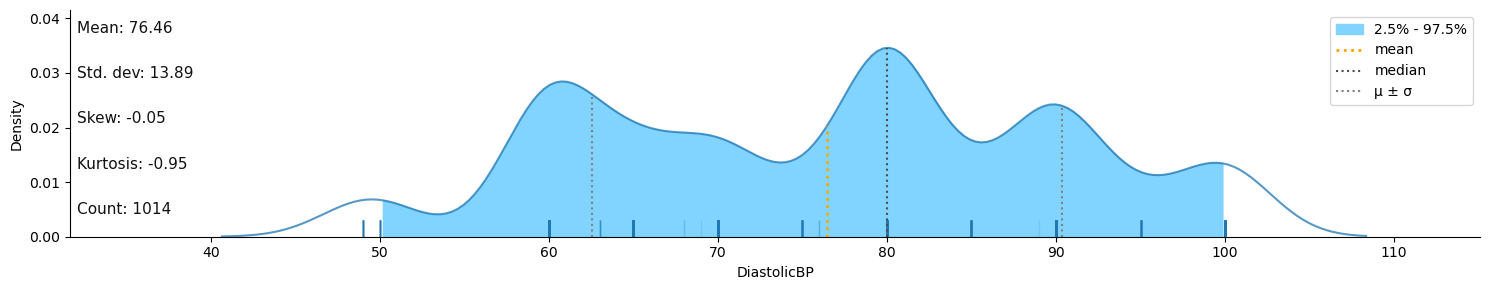

In [18]:
#DiastolicBP
uni_num('DiastolicBP')

Distribution of BS is Right Skewed
count    1014.000000
mean        8.725986
std         3.293532
min         6.000000
25%         6.900000
50%         7.500000
75%         8.000000
max        19.000000
Name: BS, dtype: float64
Upper Limit of BS is 9.649999999999999
Lower Limit of BS is 5.250000000000001
0       15.0
1       13.0
7       11.0
9       18.0
14      11.0
        ... 
1008    11.0
1009    15.0
1010    18.0
1011    19.0
1012    18.0
Name: BS, Length: 210, dtype: float64
There are total 210 outlier in BS


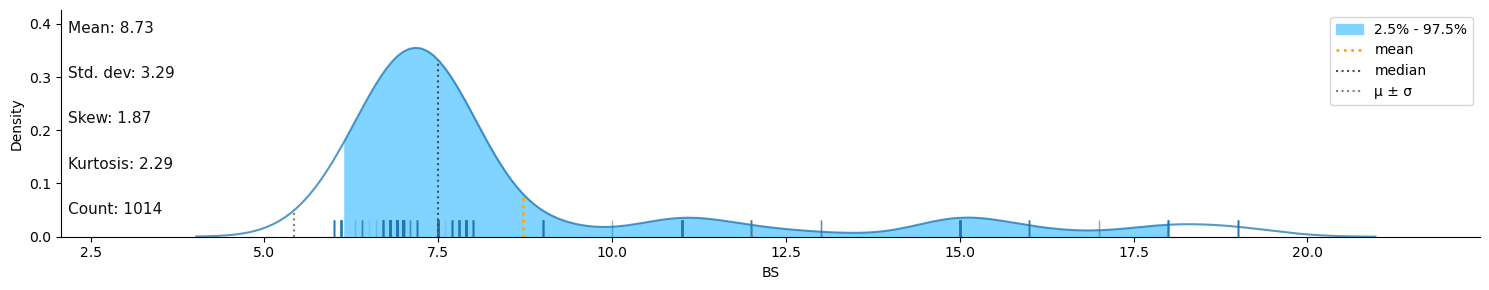

In [19]:
#BS
uni_num('BS')

Distribution of BodyTemp is Right Skewed
count    1014.000000
mean       98.665089
std         1.371384
min        98.000000
25%        98.000000
50%        98.000000
75%        98.000000
max       103.000000
Name: BodyTemp, dtype: float64
Upper Limit of BodyTemp is 98.0
Lower Limit of BodyTemp is 98.0
2       100.0
7       102.0
13      100.0
18      101.0
35      102.0
        ...  
1000    102.0
1004    101.0
1005    103.0
1006    102.0
1013    101.0
Name: BodyTemp, Length: 210, dtype: float64
There are total 210 outlier in BodyTemp


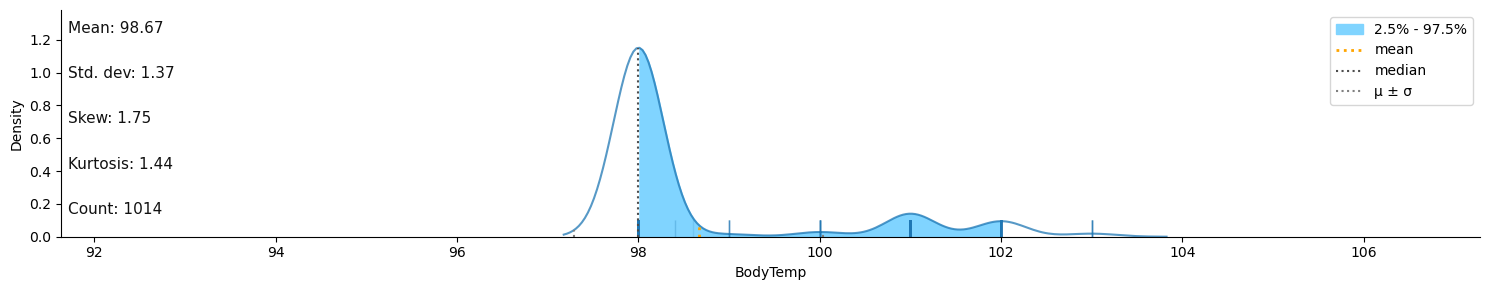

In [20]:
#BodyTemp
uni_num('BodyTemp')

Distrubtion of HeartRate is Left Skewed
Distribution of HeartRate is Right Skewed
count    1014.000000
mean       74.301775
std         8.088702
min         7.000000
25%        70.000000
50%        76.000000
75%        80.000000
max        90.000000
Name: HeartRate, dtype: float64
Upper Limit of HeartRate is 95.0
Lower Limit of HeartRate is 55.0
499    7
908    7
Name: HeartRate, dtype: int64
There are total 2 outlier in HeartRate


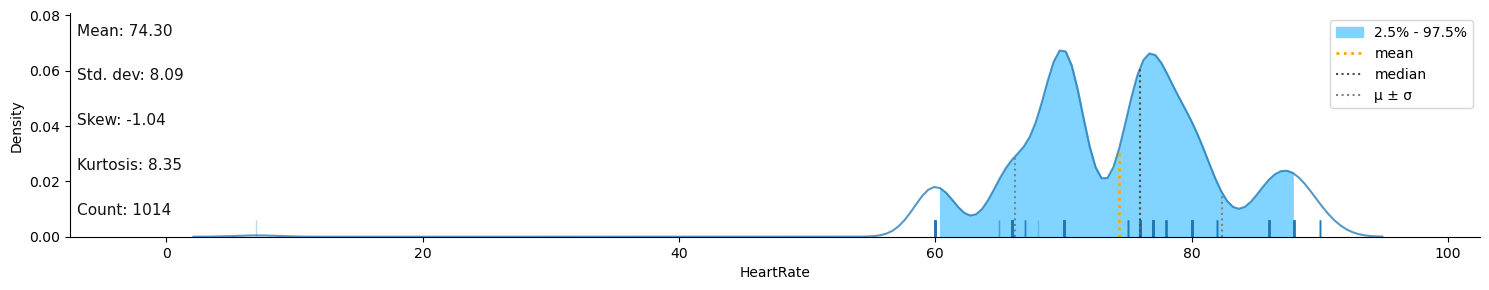

In [21]:
#HeartRate
uni_num('HeartRate')

In [22]:
#RiskLevel
uni_cat('RiskLevel')

RiskLevel contains 0.0 % null values


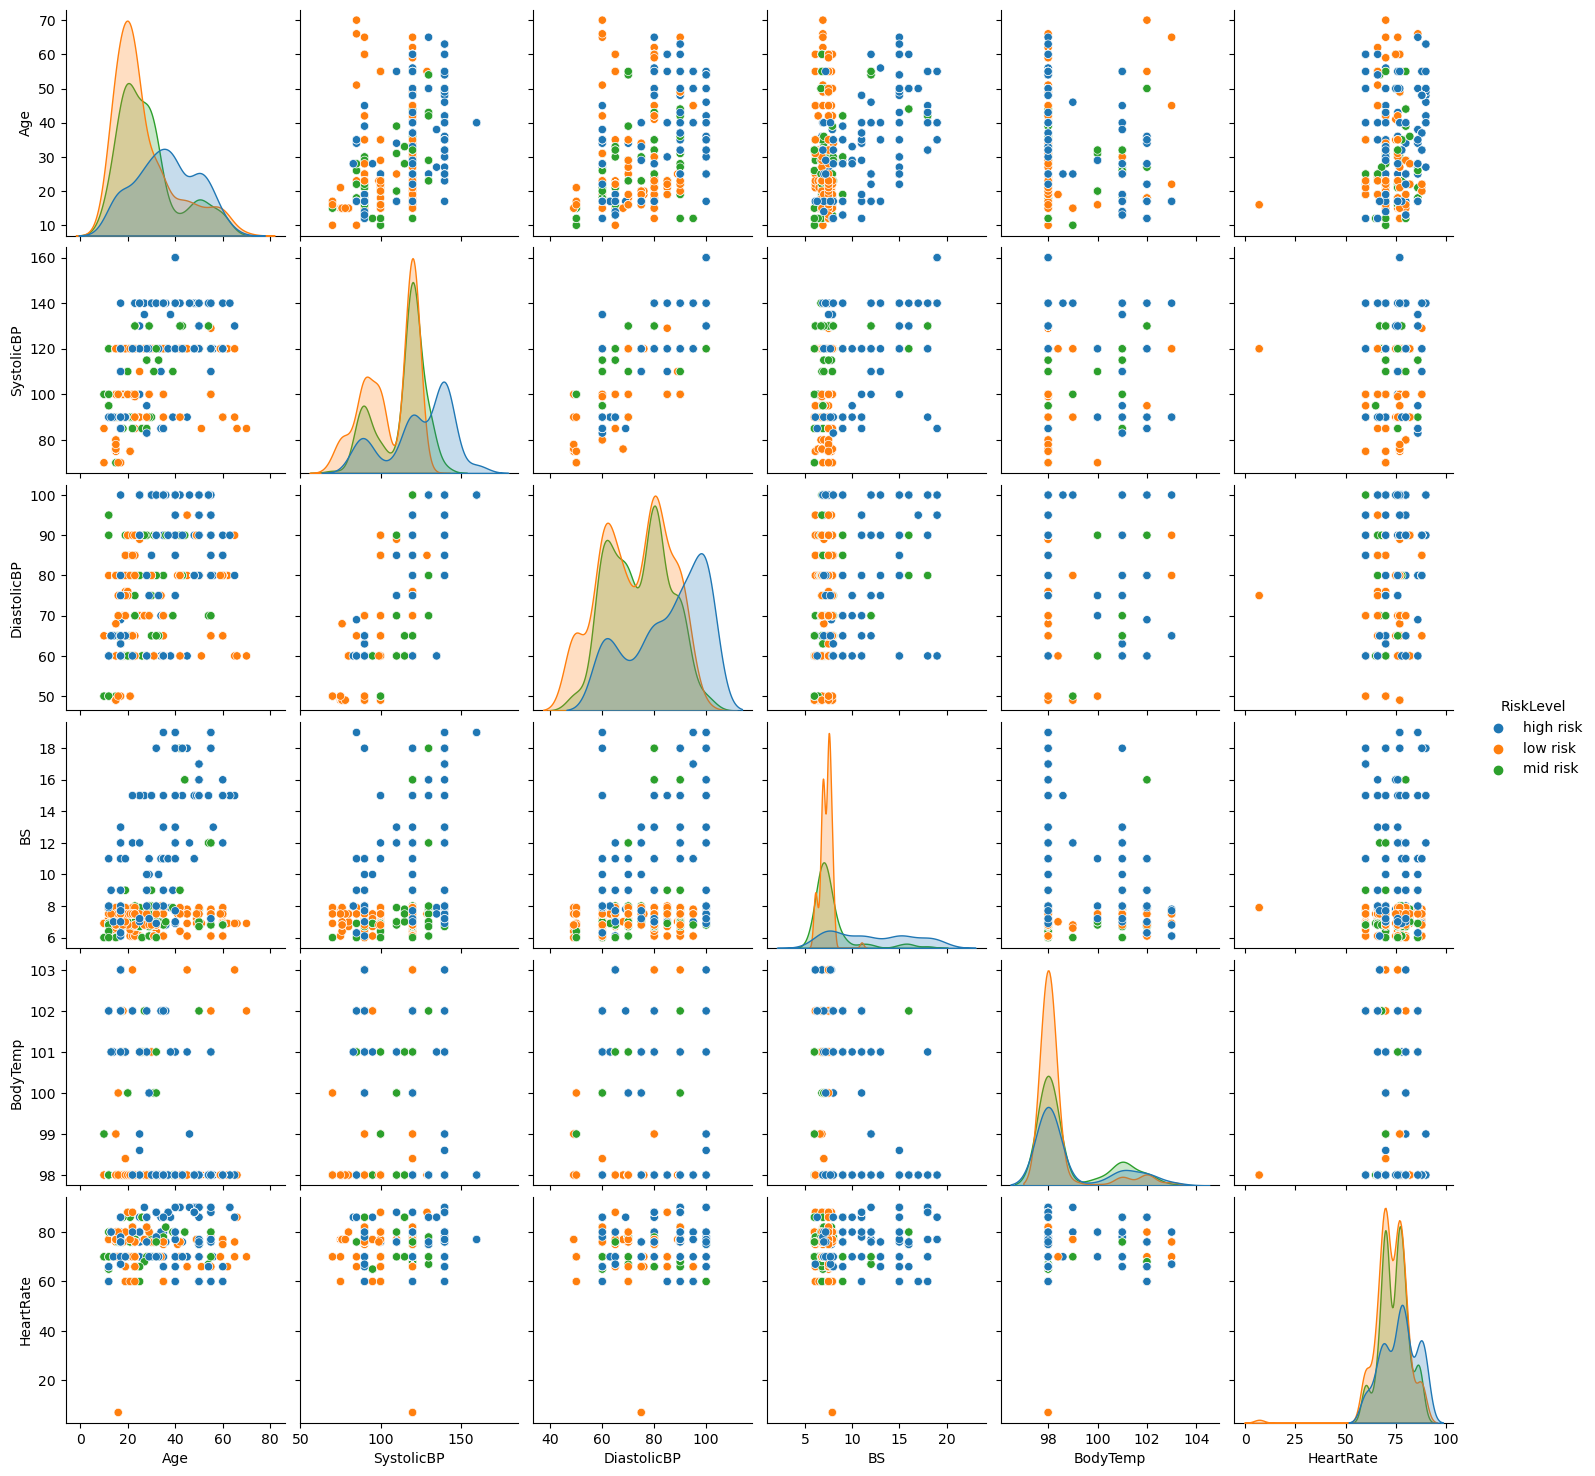

In [23]:
sns.pairplot(df,hue='RiskLevel')

<Axes: xlabel='Age', ylabel='count'>

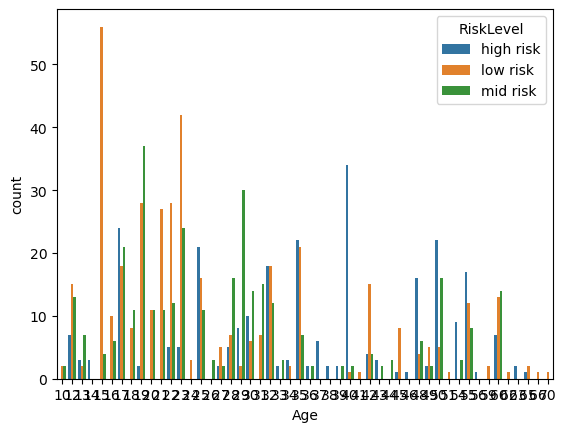

In [24]:
sns.countplot(x = "Age", data = df, hue = "RiskLevel")

<Axes: xlabel='DiastolicBP', ylabel='count'>

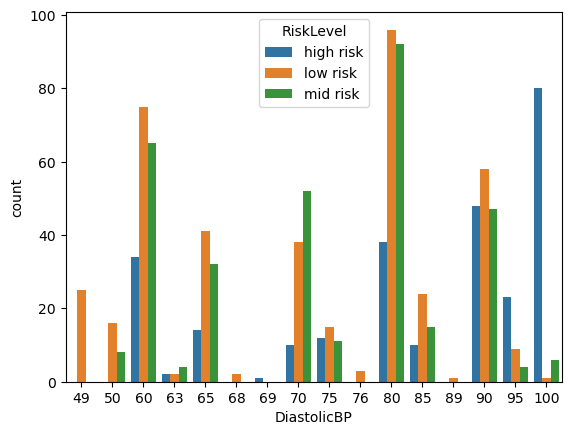

In [25]:
sns.countplot(x = "DiastolicBP", data=df, hue="RiskLevel")

In [26]:
#now we have to see if any data is duplicated or not. bcz if there is any duplicated data we wil not need that.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1009     True
1010     True
1011     True
1012     True
1013     True
Length: 1014, dtype: bool

In [27]:
df.duplicated().sum()

562

In [28]:
# #Removing Dupliciates
# df.drop_duplicates(inplace=True)

In [29]:
df

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]

In [30]:
#Feature Encoding
df[cat_col]

RiskLevel
0     high risk
1     high risk
2     high risk
3     high risk
4      low risk
...         ...
1009  high risk
1010  high risk
1011  high risk
1012  high risk
1013   mid risk

[1014 rows x 1 columns]

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder_class=[]
df['RiskLevel']=encoder.fit_transform(df['RiskLevel'])
encoder_class.append(encoder.classes_)

In [32]:
#After Encoding
df[cat_col]

RiskLevel
0             0
1             0
2             0
3             0
4             1
...         ...
1009          0
1010          0
1011          0
1012          0
1013          2

[1014 rows x 1 columns]

In [33]:
X = df.drop(columns = "RiskLevel").values
y = df["RiskLevel"].values

In [34]:
X

array([[ 25., 130.,  80.,  15.,  98.,  86.],
       [ 35., 140.,  90.,  13.,  98.,  70.],
       [ 29.,  90.,  70.,   8., 100.,  80.],
       ...,
       [ 35.,  85.,  60.,  19.,  98.,  86.],
       [ 43., 120.,  90.,  18.,  98.,  70.],
       [ 32., 120.,  65.,   6., 101.,  76.]])

In [35]:
y

array([0, 0, 0, ..., 0, 0, 2])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=0)


In [37]:
X_train.shape

(811, 6)

In [38]:
X_test.shape

(203, 6)

In [39]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler

In [40]:
stndrd = StandardScaler()
X_train = stndrd.fit_transform(X_train)
X_test = stndrd.fit_transform(X_test)

In [41]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [42]:
X_train

array([[-0.52394719,  1.45279138,  0.24829747, -0.51976254, -0.49689764,
        -0.5322086 ],
       [-0.52394719, -0.72555631,  0.61151761, -0.55351395, -0.49689764,
        -1.01977841],
       [-0.96649658, -0.18096939, -0.11492267,  1.01132388,  1.63755144,
         0.19914612],
       ...,
       [-0.45018896,  0.36361753,  0.24829747, -0.36941538, -0.49689764,
        -1.01977841],
       [ 0.36115159, -0.72555631, -0.47814281, -0.36941538, -0.49689764,
        -1.01977841],
       [ 0.13987689,  1.45279138,  1.70117803, -0.55351395, -0.49689764,
         0.44293102]])

In [43]:
X_test

array([[-0.45524272,  0.39430376,  0.97992452, -0.38438078, -0.43870553,
        -0.53325743],
       [-0.45524272,  0.93440945, -0.41750911, -0.55990502, -0.43870553,
        -0.53325743],
       [ 0.46354044, -0.68590762, -0.41750911, -0.38438078, -0.43870553,
        -1.06066917],
       ...,
       [-1.06776483,  0.39430376,  0.2812077 , -0.26736463, -0.43870553,
        -0.53325743],
       [-0.76150378, -1.22601331, -0.41750911, -0.38438078, -0.43870553,
         0.78527191],
       [-0.3021122 ,  0.39430376,  0.97992452,  1.80967216, -0.43870553,
         0.78527191]])

In [44]:
#logistic method
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, C=1.0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)

0.6350184956843403

In [45]:
#classification report
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
c_report = classification_report(y_test, y_pred)
print('Classification Report\n', c_report )

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        51
           1       0.58      0.76      0.66        75
           2       0.53      0.35      0.42        77

    accuracy                           0.61       203
   macro avg       0.61      0.63      0.61       203
weighted avg       0.60      0.61      0.59       203



# Build Logistic Regression with Hyperparameter

In [60]:
logModel = LogisticRegression()

In [61]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Import Grid Search

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [64]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


D:\nourin\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "D:\nourin\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\nourin\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\nourin\Lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueE

In [65]:
best_clf.best_estimator_

LogisticRegression(C=11.288378916846883, max_iter=1000)

In [66]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.641


# DECISION TREE

In [67]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
dtree.score(X_train, y_train)

0.9334155363748459

In [68]:
#classification report
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
c_report = classification_report(y_test, y_pred)
print('Classification Report\n', c_report )

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.69      0.83      0.75        75
           2       0.78      0.56      0.65        77

    accuracy                           0.75       203
   macro avg       0.76      0.77      0.76       203
weighted avg       0.75      0.75      0.74       203



In [69]:
confusion_matrix(y_test,y_pred)

array([[47,  1,  3],
       [ 4, 62,  9],
       [ 7, 27, 43]], dtype=int64)

# Random forest

In [108]:
### Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0) 

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[42  3  6]
 [ 3 62 10]
 [ 5  8 64]]
0.8275862068965517
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        51
           1       0.85      0.83      0.84        75
           2       0.80      0.83      0.82        77

    accuracy                           0.83       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.83      0.83       203



In [111]:
confusion_matrix(y_test,y_pred)

array([[35,  6, 10],
       [ 1, 69,  5],
       [ 8, 57, 12]], dtype=int64)

# Hypertuning

In [112]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=42).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[46  0  5]
 [ 1 67  7]
 [12 26 39]]
0.7487684729064039
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.72      0.89      0.80        75
           2       0.76      0.51      0.61        77

    accuracy                           0.75       203
   macro avg       0.75      0.77      0.75       203
weighted avg       0.75      0.75      0.74       203



In [113]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(110, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [5, 7, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [110, 208, 307, 406, 505, 604, 703, 802, 901, 1000], 'min_samples_split': [5, 7, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [114]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [110, 208, 307, 406, 505,
                                                      604, 703, 802, 901,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [115]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 901,
 'criterion': 'gini'}

In [116]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [110, 208, 307, 406, 505,
                                                      604, 703, 802, 901,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [117]:
best_random_grid=rf_randomcv.best_estimator_

In [118]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[43  3  5]
 [ 2 64  9]
 [ 5 14 58]]
Accuracy Score 0.812807881773399
Classification report:               precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.79      0.85      0.82        75
           2       0.81      0.75      0.78        77

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.81      0.81      0.81       203



# GridSearch CV

In [119]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 901,
 'criterion': 'gini'}

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [901], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}


In [121]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [901],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [131]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=901, max_features='log2', min_samples_split=3,
                       n_estimators=1500)

In [132]:
best_grid=grid_search.best_estimator_

In [133]:
best_grid

RandomForestClassifier(max_depth=901, max_features='log2', min_samples_split=3,
                       n_estimators=1500)

In [134]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 0 51  0]
 [ 0 75  0]
 [ 0 77  0]]
Accuracy Score 0.3694581280788177
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.37      1.00      0.54        75
           2       0.00      0.00      0.00        77

    accuracy                           0.37       203
   macro avg       0.12      0.33      0.18       203
weighted avg       0.14      0.37      0.20       203



D:\nourin\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\nourin\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\nourin\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# svm

In [160]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 32)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=32)

In [178]:
karnel=['sigmoid', 'poly', 'linear', 'rbf']
for i in karnel:
    model=SVC(kernel=i,C=1.0)
    model.fit(X_train,y_train)
    print ("For karnel:",i)
    print("Accuray is:",model.score(X_test,y_test))

For karnel: sigmoid
Accuray is: 0.5467980295566502
For karnel: poly
Accuray is: 0.5665024630541872
For karnel: linear
Accuray is: 0.6551724137931034
For karnel: rbf
Accuray is: 0.6798029556650246


In [167]:
model=SVC()
model.fit(X_train,y_train)
print('Accuracy on testing data',model.score(X_test,y_test) )
print('Accuracy on training data',model.score(X_train,y_train) )

Accuracy on testing data 0.6798029556650246
Accuracy on training data 0.7250308261405672


In [168]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [169]:
#classification report
#confusion matrix
c_report = classification_report(y_test, y_pred)
print('Classification Report\n', c_report )

Classification Report
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        51
           1       0.61      0.83      0.70        75
           2       0.62      0.42      0.50        77

    accuracy                           0.66       203
   macro avg       0.67      0.67      0.66       203
weighted avg       0.66      0.66      0.64       203



# GreadSearchCV

In [183]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,100,100],'kernel':['sigmoid', 'poly', 'linear', 'rbf'],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['sigmoid', 'poly', 'linear', 'rbf']})

In [185]:
accuracy = grid_search.best_score_

In [186]:
accuracy

0.8558867810900331

In [187]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 901,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1500}

In [188]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(X_train, y_train)

SVC(gamma=0.7)

In [192]:
print(grid.score(X_test,y_test))

0.7142857142857143


# Gaussian NAIVE BAISE

In [96]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
GNB.score(X_train, y_train)

0.6177558569667078

In [97]:
#classification report
#confusion matrix
c_report = classification_report(y_test, y_pred)
print('Classification Report\n', c_report )

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.69      0.74        51
           1       0.52      0.92      0.67        75
           2       0.44      0.16      0.23        77

    accuracy                           0.57       203
   macro avg       0.59      0.59      0.54       203
weighted avg       0.56      0.57      0.52       203



In [98]:
confusion_matrix(y_test,y_pred)

array([[35,  6, 10],
       [ 1, 69,  5],
       [ 8, 57, 12]], dtype=int64)

In [194]:
model=GaussianNB()
model.fit(X_train,y_train)
print('Accuracy on testing data',model.score(X_test,y_test) )
print('Accuracy on training data',model.score(X_train,y_train) )

Accuracy on testing data 0.5566502463054187
Accuracy on training data 0.6177558569667078


# Hyperparameter Tuning to improve Accuracy

In [99]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [100]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [195]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [196]:
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [197]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        51
           1       0.53      0.95      0.68        75
           2       0.41      0.12      0.18        77

    accuracy                           0.58       203
   macro avg       0.58      0.60      0.54       203
weighted avg       0.55      0.58      0.51       203


 Confusion Matrix:



<Axes: >

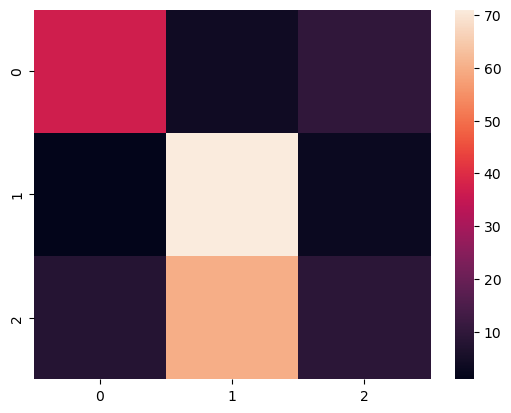

In [201]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

# Bernoulli NAIVE BAISE

In [202]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
y_pred = BNB.predict(X_test)
BNB.score(X_train, y_train)

0.6115906288532675

In [203]:
model=BernoulliNB()
model.fit(X_train,y_train)
print('Accuracy on testing data',model.score(X_test,y_test) )
print('Accuracy on training data',model.score(X_train,y_train) )

Accuracy on testing data 0.541871921182266
Accuracy on training data 0.6115906288532675


In [204]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [205]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [206]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

# Linear Discriminant Analysis

In [223]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA = LDA()
LDA.fit(X_train, y_train)
y_pred = LDA.predict(X_test)
LDA.score(X_train, y_train)

0.6461159062885327

In [224]:
#classification report
#confusion matrix
c_report = classification_report(y_test, y_pred)
print('Classification Report\n', c_report )

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.61      0.67        51
           1       0.60      0.85      0.70        75
           2       0.55      0.39      0.45        77

    accuracy                           0.62       203
   macro avg       0.63      0.62      0.61       203
weighted avg       0.62      0.62      0.60       203



# LDA Hyperparameters

In [225]:
search=GridSearchCV(model, grid, scoring='accuracy', cv=3, n_jobs=-1 )

In [226]:
# evaluate a LDA model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.893 (0.033)


In [227]:
# make a prediction with a lda model on the dataset
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


In [228]:
#In this case, we can see that the default SVD solver performs the best compared to the other built-in solvers
Config: {'solver': 'svd'}

In [229]:
# grid search shrinkage for lda
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.894
Config: {'shrinkage': 0.02}
